<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/02-03_03-non-linear-exponential-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 3. Exponential Models

Exponential models are a type of non-linear regression model that describes exponential growth or decay in a variable. Exponential models are widely used in various fields such as biology, finance, physics, and engineering to describe phenomena that exhibit exponential behavior. In this tutorial, we will explore exponential models, their applications, and how to fit exponential models in R.




## Key Points about Exponential Models

1. **Exponential Growth**: Exponential growth models describe phenomena where a quantity increases at a rate proportional to its current value. Mathematically, exponential growth is represented by the equation $y = a \cdot e^{bx}$, where $a$ is the initial value and $b$ is the growth rate.

2. **Exponential Decay**: Exponential decay models describe phenomena where a quantity decreases at a rate proportional to its current value. Mathematically, exponential decay is represented by the equation $y = a \cdot e^{-bx}$, where $a$ is the initial value and $b$ is the decay rate.

3. **Applications**: Exponential models are used to describe a wide range of natural  phenomena, such as population growth, radioactive decay, compound interest, and more.

### Install rpy2

In [3]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314974 sha256=72df05271a1bac1c56bf9af9cd15637b9f749a2741dd5c9854e8caa2e3e3862a
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


### Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install Rrequired R Packages

In [7]:
%%R
# Packages List
packages <- c(
  "tidyverse",   # Includes readr, dplyr, ggplot2, etc.
  'patchwork',   # for visualization
  'minpack.lm',  # for damped exponential model
  'nlstools'     # for bootstrapping
)

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [6]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
 tidyverse  patchwork minpack.lm   nlstools 
      TRUE       TRUE       TRUE       TRUE 


### Load R Packages

In [8]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packages


Successfully loaded packages:
 [1] "package:nlstools"   "package:minpack.lm" "package:patchwork" 
 [4] "package:lubridate"  "package:forcats"    "package:stringr"   
 [7] "package:dplyr"      "package:purrr"      "package:readr"     
[10] "package:tidyr"      "package:tibble"     "package:ggplot2"   
[13] "package:tidyverse"  "package:tools"      "package:stats"     
[16] "package:graphics"   "package:grDevices"  "package:utils"     
[19] "package:datasets"   "package:methods"    "package:base"      


## Exponential Growth and Decay Models

Exponential models are mathematical functions that describe exponential growth or decay. These models are used in various fields such as finance, biology, physics, and economics. Below are the different types of exponential models:

1. **Exponential Growth Model**
  
  $$  y = a e^{bx} $$
     where:
     - $y$ is the output,
     - $a$) is the initial value (when $x = 0$),
     - $b$ is the growth rate ($b > 0$),
     - $e$ is Euler’s number ($\approx 2.718$),
     - $x$ is the independent variable (often time).

   - **Characteristics:**
     - Increases rapidly over time.
     - Common in population growth, compound interest, and viral spread.
     
2. **Exponential Decay Model**

   - **Formula:**  
    $$ y = a e^{- bx} $$
    
     where $b > 0$, leading to a decreasing function.

   - **Characteristics:**
     - Decreases over time.
     - Common in radioactive decay, cooling of objects (Newton’s Law of Cooling), and depreciation of assets.



Below is an example of how to fit a  Exponential  Growth and Decay Models in R using nonlinear least squares:

You'll need the `nls()` (nonlinear least squares) function for fitting nonlinear models and `ggplot2` for visualization.

In [10]:
%%R

# Generate synthetic data
set.seed(123)  # For reproducibility
x <- seq(0, 10, length.out = 100)

# Exponential Growth Data (y = a * exp(b * x))
y_growth <- 2 * exp(0.3 * x) + rnorm(100, 0, 2)  # Adding noise
growth_data <- data.frame(x, y_growth)

# Exponential Decay Data (y = a * exp(-b * x))
y_decay <- 10 * exp(-0.4 * x) + rnorm(100, 0, 1)  # Adding noise
decay_data <- data.frame(x, y_decay)

# ---- Fit Exponential Growth Model ----
growth_model <- nls(y_growth ~ a * exp(b * x), data = growth_data,
                    start = list(a = 1, b = 0.1))
growth_data$growth_pred <- predict(growth_model)

# ---- Fit Exponential Decay Model ----
decay_model <- nls(y_decay ~ a * exp(-b * x), data = decay_data,
                   start = list(a = 10, b = 0.2))
decay_data$decay_pred <- predict(decay_model)

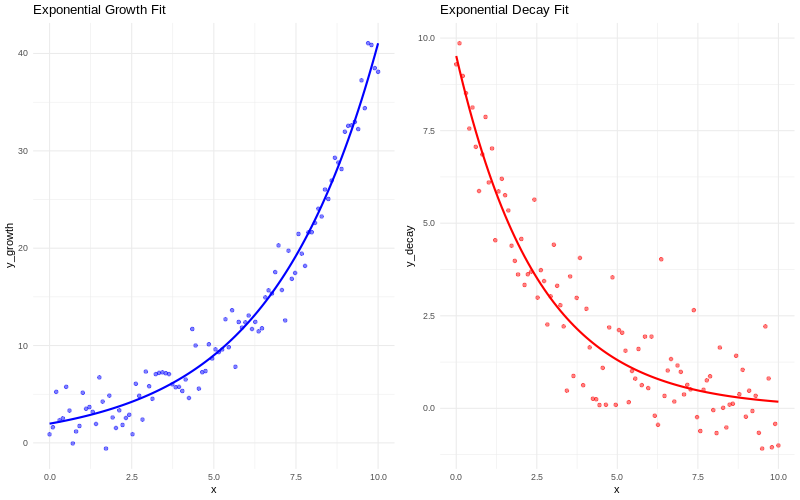

In [16]:
%%R -w 800 -h 500 -u px

# ---- Plot Exponential Growth ----
p1 <- ggplot(growth_data, aes(x)) +
  geom_point(aes(y = y_growth), color = "blue", alpha = 0.5) +  # Actual data points
  geom_line(aes(y = growth_pred), color = "blue", size = 1) +  # Fitted curve
  ggtitle("Exponential Growth Fit") +
  theme_minimal()

# ---- Plot Exponential Decay ----
p2 <- ggplot(decay_data, aes(x)) +
  geom_point(aes(y = y_decay), color = "red", alpha = 0.5) +  # Actual data points
  geom_line(aes(y = decay_pred), color = "red", size = 1) +  # Fitted curve
  ggtitle("Exponential Decay Fit") +
  theme_minimal()

# Display both plots
library(gridExtra)
grid.arrange(p1, p2, ncol = 2)

## Double Exponential Growth Model

A double exponential growth model describes a process where the quantity grows at an accelerating rate, meaning the growth rate itself is growing exponentially. This model is characterized by a positive second growth rate. It is often used in contexts where growth accelerates over time, such as in certain financial markets, technological advancements, or biological phenomena.

The general form of a double exponential growth model is:

$$ y = a \cdot e^{b \cdot e^{cx}} $$

where:
- $y$ is the dependent variable.
- $x$ is the independent variable.
- $a$ is the initial value (the value of $y$ when $x = 0$).
- $b$ and $c$ are positive growth rates.
- $e$ is the base of the natural logarithm (approximately equal to 2.71828).




Below is an example of how to fit a double exponential growth model in R using nonlinear least squares:

        a         b         c 
2.0739010 0.4922369 0.3012036 


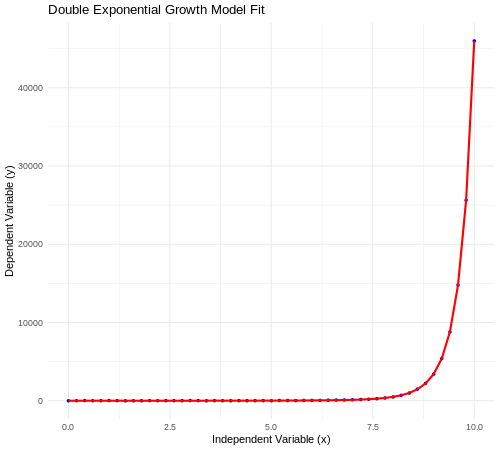

In [14]:
%%R -w 500 -h 450 -u px

# Generate example data
set.seed(123)
x <- seq(0, 10, by = 0.2)
a <- 2
b <- 0.5
c <- 0.3
y <- a * exp(b * exp(c * x)) + rnorm(length(x), sd = 10)

# Define the double exponential growth model function
double_exp_model <- function(params, x) {
  a <- params[1]
  b <- params[2]
  c <- params[3]
  a * exp(b * exp(c * x))
}

# Define the residual function for nonlinear least squares
residuals <- function(params, x, y) {
  y - double_exp_model(params, x)
}

# Initial parameter guesses
init_params <- c(a = 1, b = 0.1, c = 0.1)

# Fit the model using nonlinear least squares
fit <- nls.lm(par = init_params, fn = residuals, x = x, y = y)

# Extract fitted parameters
fitted_params <- fit$par
print(fitted_params)

# Generate fitted values
y_fitted <- double_exp_model(fitted_params, x)

# Plot the data and fitted model
plot_data <- data.frame(x = x, y = y, y_fitted = y_fitted)
ggplot(plot_data, aes(x = x)) +
  geom_point(aes(y = y), color = 'blue', size = 1) +
  geom_line(aes(y = y_fitted), color = 'red', size = 1) +
  ggtitle('Double Exponential Growth Model Fit') +
  xlab('Independent Variable (x)') +
  ylab('Dependent Variable (y)') +
  theme_minimal()



## Damped Exponential Model

A damped exponential model describes a process where the amplitude of the oscillations decreases over time. This model is often used in physics and engineering to describe systems that exhibit damped harmonic motion, such as a mass-spring-damper system.

The general form of a damped exponential model is:

$$ y(t) = A \cdot e^{-\lambda t} \cdot \cos(\omega t + \phi)  $$

where:
- $y(t)$ is the dependent variable at time $t$.
- $A$ is the initial amplitude.
- $\lambda$ is the damping coefficient.
- $\omega$ is the angular frequency.
- $\phi$ is the phase shift.
- $e$ is the base of the natural logarithm (approximately equal to 2.71828).

**Applications**
- Mechanical systems with damping (e.g., mass-spring-damper systems)
- Electrical circuits with resistance (e.g., RLC circuits)
- Biological systems (e.g., neuron firing patterns)



Below is an example of how to fit a damped exponential model in R using nonlinear least squares:


        A    lambda     omega       phi 
4.9541405 0.3033703 3.1848578 0.7603952 


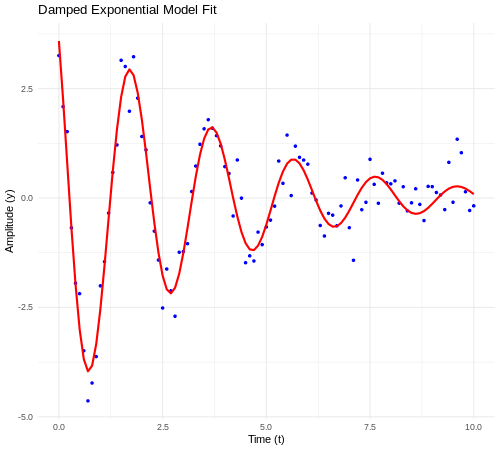

In [17]:
%%R -w 500 -h 450 -u px

# Generate example data
set.seed(123)
t <- seq(0, 10, by = 0.1)
A <- 5
lambda <- 0.3
omega <- 2 * pi * 0.5
phi <- pi / 4
y <- A * exp(-lambda * t) * cos(omega * t + phi) + rnorm(length(t), sd = 0.5)

# Define the damped exponential model function
damped_exp_model <- function(params, t) {
  A <- params[1]
  lambda <- params[2]
  omega <- params[3]
  phi <- params[4]
  A * exp(-lambda * t) * cos(omega * t + phi)
}

# Define the residual function for nonlinear least squares
residuals <- function(params, t, y) {
  y - damped_exp_model(params, t)
}

# Initial parameter guesses
init_params <- c(A = 5, lambda = 0.3, omega = 2 * pi * 0.5, phi = pi / 4)

# Fit the model using nonlinear least squares
fit <- nls.lm(par = init_params, fn = residuals, t = t, y = y)

# Extract fitted parameters
fitted_params <- fit$par
print(fitted_params)

# Generate fitted values
y_fitted <- damped_exp_model(fitted_params, t)

# Plot the data and fitted model
plot_data <- data.frame(t = t, y = y, y_fitted = y_fitted)
ggplot(plot_data, aes(x = t)) +
  geom_point(aes(y = y), color = 'blue', size = 1) +
  geom_line(aes(y = y_fitted), color = 'red', size = 1) +
  ggtitle('Damped Exponential Model Fit') +
  xlab('Time (t)') +
  ylab('Amplitude (y)') +
  theme_minimal()

## Fit Expontial Model with Real Data

In this section, we will fit an exponential model to real-world data using R. We will use a dataset, which contains information about Arsenic (As) content in rice vaegeative parts  (`STAs`) and Tansfer Factor (ratio of As in grain and straw). We will fit an exponential growth model to the relationship between STAs and TF to explore TF changes as As uptake increases by rice.


In [18]:
%%R
# Load data
mf<-readr::read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/tf_data.csv") |>
  glimpse()



Rows: 260 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Rice_Var
dbl (2): STAs, TF

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 260
Columns: 3
$ STAs     <dbl> 0.9, 1.0, 1.6, 1.6, 1.6, 1.8, 1.9, 2.2, 2.3, 2.4, 2.5, 2.5, 2…
$ TF       <dbl> 0.13888889, 0.09400000, 0.06750000, 0.09187500, 0.06062500, 0…
$ Rice_Var <chr> "Purbachi", "Purbachi", "Ratna", "Purbachi", "Purbachi", "Pur…


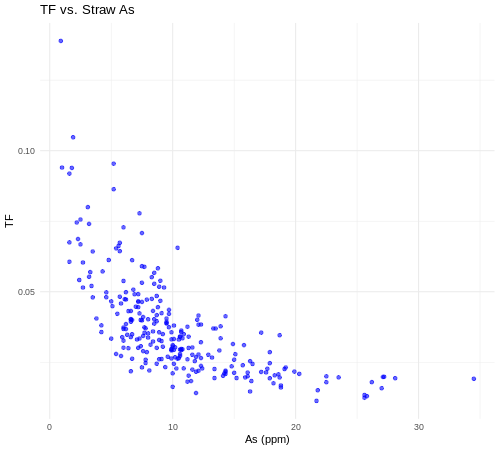

In [19]:
%%R -w 500 -h 450 -u px
# Plot data
ggplot(mf, aes(x = STAs, y = TF)) +
  geom_point(alpha = 0.6, color = "blue") +
  labs(title = "TF vs. Straw As ", x = "As (ppm)", y = "TF") +
  theme_minimal()


We  performed Log-Transformation of  the Data to linearize the relationship for fitting:

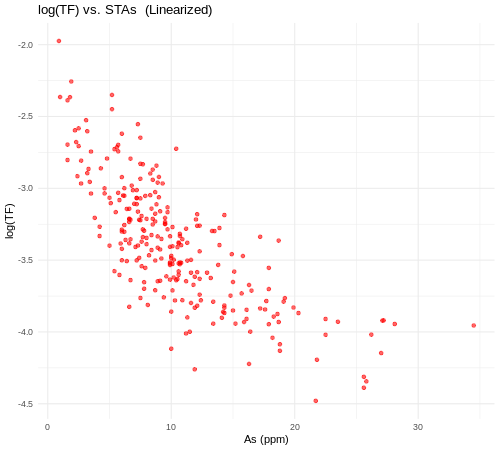

In [22]:
%%R -w 500 -h 450 -u px

# Add log(TF) column (avoid log(0) issues)
mf <- mf  |>
  mutate(logTF = log(TF))  # Already provided in your CSV, but we recalculate here

# Plot transformed data
ggplot(mf, aes(x = STAs, y = logTF)) +
  geom_point(alpha = 0.6, color = "red") +
  labs(title = "log(TF) vs. STAs  (Linearized)", x = "As (ppm)", y = "log(TF)") +
  theme_minimal()

Now, we fit an exponential decay model to the log-transformed data using nonlinear least squares:

In [23]:
%%R
# Fit model: log(TF) = β₀ + β₁ * stas
model.exp <- lm(log(TF) ~ STAs, data = mf)

# Summary of results
summary(model.exp)


Call:
lm(formula = log(TF) ~ STAs, data = mf)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.78385 -0.19435 -0.01188  0.18099  0.85474 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.774480   0.037201  -74.58   <2e-16 ***
STAs        -0.058992   0.003173  -18.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2835 on 258 degrees of freedom
Multiple R-squared:  0.5726,	Adjusted R-squared:  0.5709 
F-statistic: 345.6 on 1 and 258 DF,  p-value: < 2.2e-16



In [24]:
%%R
# Extract model parameters
A <- exp(coef(model.exp)[1])  # Initial value (when stas = 0)
beta <- coef(model.exp)[2]    # Decay rate

cat("Exponential model: TF =", round(A, 4), "* e^(", round(beta, 4), "* STAs)")

Exponential model: TF = 0.0624 * e^( -0.059 * STAs)

- Inntercept (β₀): Estimated log(A) in the exponential model TF = A * e^(β₁ * stas).

- Slope (β₁): Decay rate (since TF decreases as stas increases).

- Use exp(coef(model)[1]) to recover A.

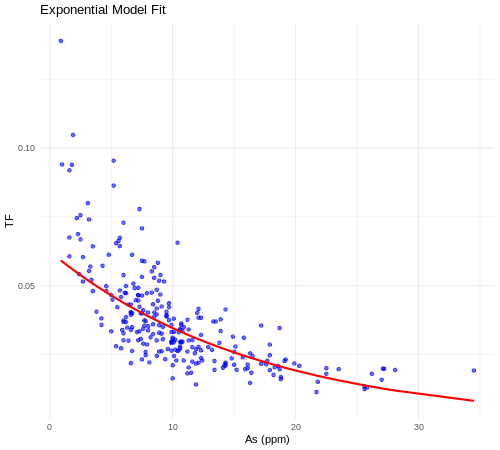

In [25]:
%%R -w 500 -h 450 -u px
# Add predictions to the data
mf$predicted <- exp(predict(model.exp))

# Plot raw data and fitted curve
ggplot(mf, aes(x = STAs, y = TF)) +
  geom_point(alpha = 0.6, color = "blue") +
  geom_line(aes(y = predicted), color = "red", linewidth = 1) +
  labs(title = "Exponential Model Fit", x = "As (ppm)", y = "TF") +
  theme_minimal()

We can also use `nls()` function to fit an exponential model to the data:

          a           b 
 0.08323492 -0.08845286 


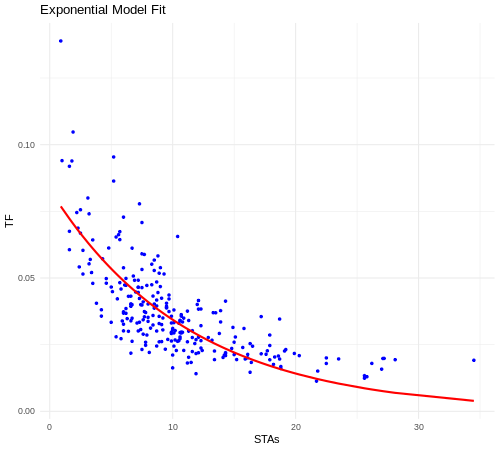

In [26]:
%%R -w 500 -h 450 -u px
# Define the exponential model function
exp_model <- function(params, x) {
  a <- params[1]
  b <- params[2]
  a * exp(b * x)
}

# Define the residual function for nonlinear least squares
residuals <- function(params, x, y) {
  y - exp_model(params, x)
}

# Initial parameter guesses
init_params <- c(a = 0.1, b = -0.1)

# Fit the model using nonlinear least squares
fit <- nls.lm(par = init_params, fn = residuals, x = mf$STAs, y = mf$TF)

# Extract fitted parameters
fitted_params <- fit$par
print(fitted_params)

# Generate fitted values
y_fitted <- exp_model(fitted_params, mf$STAs)

# Plot the data and fitted model
plot_data <- data.frame(STAs = mf$STAs, TF = mf$TF, y_fitted = y_fitted)
ggplot(plot_data, aes(x = STAs)) +
  geom_point(aes(y = TF), color = 'blue', size = 1) +
  geom_line(aes(y = y_fitted), color = 'red', size = 1) +
  ggtitle('Exponential Model Fit') +
  xlab('STAs') +
  ylab('TF') +
  theme_minimal()

## Compare Exponential Model with Other Models

Now we can fit  exponential model to the data and compare it with other models like linear, polynomial, logarithmic, and hyperbolic models to determine the best fitting model based on the R-squared value.

### Linear Model

In [27]:
%%R
# Linear model
linear_model <- lm(TF ~ STAs, data = mf)
summary(linear_model)


Call:
lm(formula = TF ~ STAs, data = mf)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.023552 -0.008652 -0.002140  0.005127  0.081270 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.059553   0.001747   34.09   <2e-16 ***
STAs        -0.002149   0.000149  -14.42   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01331 on 258 degrees of freedom
Multiple R-squared:  0.4464,	Adjusted R-squared:  0.4442 
F-statistic:   208 on 1 and 258 DF,  p-value: < 2.2e-16



### Polynomial Models (degree 2)

In [28]:
%%R
# Polynomial model (degree 2)
poly2_model <- lm(TF ~ poly(STAs, 2), data = mf)
summary(poly2_model)


Call:
lm(formula = TF ~ poly(STAs, 2), data = mf)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.024706 -0.006661 -0.001025  0.004815  0.064736 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.0373524  0.0007182  52.010   <2e-16 ***
poly(STAs, 2)1 -0.1919900  0.0115802 -16.579   <2e-16 ***
poly(STAs, 2)2  0.1060970  0.0115802   9.162   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01158 on 257 degrees of freedom
Multiple R-squared:  0.5827,	Adjusted R-squared:  0.5794 
F-statistic: 179.4 on 2 and 257 DF,  p-value: < 2.2e-16



### Polynomial model (degree 3)

In [30]:
%%R
# Polynomial model (degree 3)
poly3_model <- lm(TF ~ poly(STAs, 3), data = mf)
summary(poly3_model)


Call:
lm(formula = TF ~ poly(STAs, 3), data = mf)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.023413 -0.006333 -0.001354  0.005036  0.055622 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.0373524  0.0006926  53.927  < 2e-16 ***
poly(STAs, 3)1 -0.1919900  0.0111686 -17.190  < 2e-16 ***
poly(STAs, 3)2  0.1060970  0.0111686   9.500  < 2e-16 ***
poly(STAs, 3)3 -0.0503123  0.0111686  -4.505 1.01e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01117 on 256 degrees of freedom
Multiple R-squared:  0.6133,	Adjusted R-squared:  0.6088 
F-statistic: 135.3 on 3 and 256 DF,  p-value: < 2.2e-16



### Exponential Model

In [31]:
%%R
# Exponential model
exp_model <- nls(TF ~ a * exp(b * STAs), data = mf, start = list(a = 0.1, b = -0.1))
summary(exp_model)


Formula: TF ~ a * exp(b * STAs)

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a  0.083235   0.003211   25.93   <2e-16 ***
b -0.088453   0.004960  -17.83   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01158 on 258 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 3.842e-06



### Logarithmic Model

Logarithmic models are used when the rate of change in the data decreases over time or space. The general form of a logarithmic model is:

$$ y = a + b \cdot \ln(x) $$

where:
- $y$ is the dependent variable.
- $a$ and $b$ are parameters that determine the shape of the curve.
- $\ln(x)$ is the natural logarithm of the independent variable $x$.

In [32]:
%%R
# Logarithmic model
log_model <- lm(TF ~ log(STAs), data = mf)
summary(log_model)


Call:
lm(formula = TF ~ log(STAs), data = mf)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.022725 -0.006195 -0.001335  0.004821  0.046222 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.090122   0.002608   34.55   <2e-16 ***
log(STAs)   -0.024153   0.001153  -20.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01089 on 258 degrees of freedom
Multiple R-squared:  0.6297,	Adjusted R-squared:  0.6282 
F-statistic: 438.7 on 1 and 258 DF,  p-value: < 2.2e-16



### Hyperbolic Model

A hyperbolic model is a type of mathematical model used to describe relationships that follow a hyperbolic distribution. In its simplest form, a    hyperbolic model can be represented as:

$$ y = \frac{a}{b + x} $$

In [33]:
%%R
# Hyperbolic model
hyperbolic_model <- nls(TF ~ a / (b + STAs), data = mf, start = list(a = 1, b = 1))
summary(hyperbolic_model)


Formula: TF ~ a/(b + STAs)

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a  0.45618    0.02088  21.846   <2e-16 ***
b  3.82145    0.38951   9.811   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01078 on 258 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 8.428e-06



### Compare Models's Performance

In [34]:
%%R
metrics <- tibble(
  Model = c("Linear", "Poly-2", "Poly-3", "Exponential", "Logarithmic", "Hyperbolic"),
  RSE = c(summary(linear_model)$sigma,
          summary(poly2_model)$sigma,
          summary(poly3_model)$sigma,
          summary(exp_model)$sigma,
          summary(log_model)$sigma,
          summary(hyperbolic_model)$sigma),
  AIC = c(AIC(linear_model),
          AIC(poly2_model),
          AIC(poly3_model),
          AIC(exp_model),
          AIC(log_model),
          AIC(hyperbolic_model)),
  BIC = c(BIC(linear_model),
          BIC(poly2_model),
          BIC(poly3_model),
          BIC(exp_model),
          BIC(log_model),
          BIC(hyperbolic_model)),
  R2 = c(summary(linear_model)$r.squared,
         summary(poly2_model)$r.squared,
         summary(poly3_model)$r.squared,
         1 - sum(resid(exp_model)^2) / sum((mf$TF - mean(mf$TF))^2), # Adjusted R-squared for nls
        summary(log_model)$r.squared,
         1- sum(resid(hyperbolic_model)^2) / sum((mf$TF - mean(mf$TF))^2)) # Adjusted R-squared for nls
)
metrics

# A tibble: 6 × 5
  Model          RSE    AIC    BIC    R2
  <chr>        <dbl>  <dbl>  <dbl> <dbl>
1 Linear      0.0133 -1504. -1493. 0.446
2 Poly-2      0.0116 -1576. -1561. 0.583
3 Poly-3      0.0112 -1593. -1576. 0.613
4 Exponential 0.0116 -1576. -1566. 0.581
5 Logarithmic 0.0109 -1609. -1598. 0.630
6 Hyperbolic  0.0108 -1614. -1603. 0.637


### The Best Model

In [35]:
%%R
best_model <- names(which.max(metrics$R2))
cat("Best model is:", best_model, "with R-squared value:", max(metrics$R2), "\n")


Best model is: with R-squared value: 0.6371639 


### Plot Fitted Models

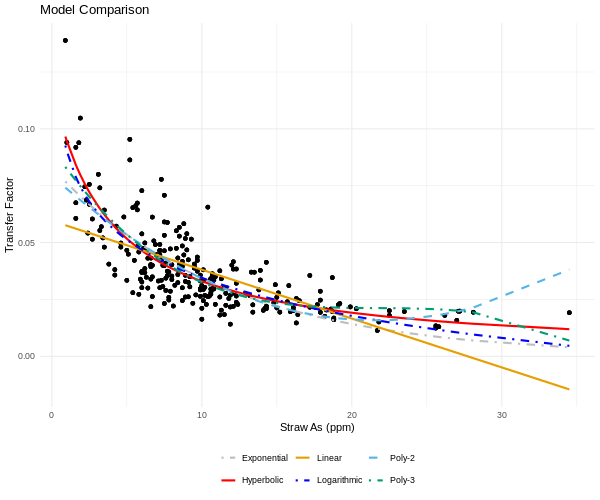

In [36]:
%%R -w 600 -h 500 -u px
# Add predictions
mf<- mf %>%
  mutate(
    linear_pred = predict(linear_model),
    poly2_pred = predict(poly2_model),
    poly3_pred = predict(poly3_model),
    exp_pred = predict(exp_model),
    log_pred = predict(log_model),
    hyper_pred = predict(hyperbolic_model)
  )

# Reshape predictions into long format for legend
mf_long <- mf %>%
  pivot_longer(
    cols = c("linear_pred", "poly2_pred", "poly3_pred", "exp_pred", "log_pred", "hyper_pred"),
    names_to = "Model",
    values_to = "Prediction"
  ) %>%
  mutate(
Model = case_when(
      Model == "linear_pred" ~ "Linear",
      Model == "poly2_pred" ~ "Poly-2",
      Model == "poly3_pred" ~ "Poly-3",
      Model == "exp_pred" ~ "Exponential",
      Model == "log_pred" ~ "Logarithmic",
      Model == "hyper_pred" ~ "Hyperbolic"
    )
  )

# Define colors and linetypes
model_colors <- c(
  "Linear" = "#E69F00",
  "Poly-2" = "#56B4E9",
  "Poly-3" = "#009E73",
  "Exponential" = "gray",
  "Logarithmic" = "blue",
  "Hyperbolic" = "red"
)

model_linetypes <- c(
  "Linear" = "solid",
  "Poly-2" = "dashed",
  "Poly-3" = "dotdash",
  "Exponential" = "dotdash",
  "Logarithmic" = "dotdash",
  "Hyperbolic" = "solid"

)

ggplot(mf_long, aes(x = STAs, y = TF)) +
  geom_point(alpha = 0.6, color = "black") +
  geom_line(
    aes(y = Prediction, color = Model, linetype = Model),
    linewidth = 1
  ) +
  scale_color_manual(values = model_colors) +
  scale_linetype_manual(values = model_linetypes) +
  labs(
    title = "Model Comparison",
    x = "Straw As (ppm)",
    y = "Transfer Factor"
  ) +
  theme_minimal() +
  theme(
    legend.position = "bottom",
    legend.title = element_blank(),  # Remove legend title
    legend.spacing.x = unit(0.5, "cm")  # Add spacing between legend items
  ) +
  guides(
    color = guide_legend(nrow = 2),  # Split color legend into 2 lines
    linetype = guide_legend(nrow = 2)  # Split linetype legend into 2 lines
  )


## Summary and Conclusions

In this R tutorial, we explored various types of exponential models and demonstrated how to fit them using R. Exponential models are powerful tools for describing processes that exhibit growth or decay at rates proportional to their current values. Here is a summary of what we covered:

1. **Exponential Growth Model**:
   - Describes processes with a constant proportional growth rate.
   - Commonly used in population growth, finance, and the spread of diseases.

2. **Exponential Decay Model**:
   - Describes processes with a constant proportional decay rate.
   - Used in radioactive decay, cooling of objects, and depreciation of assets.

3. **Damped Exponential Model**:
   - Describes processes where the amplitude of oscillations decreases over time.
   - Applied in mechanical systems with damping, electrical circuits, and biological systems.

4. **Double Exponential Growth Model**:
   - Describes processes with an accelerating growth rate.
   - Used in technological advancements, financial markets, and certain biological phenomena.

For each type of model, we discussed the mathematical equations and provided R code to generate example data, fit the models using nonlinear least squares, and visualize the results using `ggplot2`. By understanding and applying these models, you can accurately capture and predict the behavior of various real-world phenomena that exhibit exponential growth or decay.



By mastering these techniques, you can leverage exponential models to gain insights and make predictions in diverse applications, ranging from biology and physics to finance and engineering.


## References

Here are some books and online resources that provide comprehensive information about exponential models, including their applications, fitting techniques, and theoretical foundations:

### Books

1. **"Nonlinear Regression with R" by Christian Ritz and Jens C. Streibig**
   - This book provides an in-depth treatment of nonlinear regression models, including exponential models. It covers the mathematical theory, model fitting, and interpretation using R.

2. **"Applied Regression Analysis and Generalized Linear Models" by John Fox**
   - This book covers a wide range of regression models, including exponential regression. It provides theoretical insights and practical examples using R.

3. **"Nonlinear Models for Repeated Measurement Data" by Marie Davidian and David M. Giltinan**
   - This book focuses on nonlinear models, including exponential models, for analyzing repeated measurement data. It includes detailed discussions on model fitting and interpretation.

4. **"Regression Modeling Strategies" by Frank E. Harrell Jr.**
   - This book covers various regression modeling strategies, including nonlinear and exponential models. It provides practical guidance on model selection, fitting, and validation.

5. **"An Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani**
   - This book provides an accessible introduction to statistical learning, including exponential models. It includes practical examples and R code.

### Online Resources

1. **Coursera - "Regression Models" by Johns Hopkins University**
   - This online course covers various regression models, including exponential models. It provides video lectures, quizzes, and practical exercises using R.
   - [Course Link](https://www.coursera.org/learn/regression-models)

2. **Khan Academy - "Exponential Models"**
   - Khan Academy offers free tutorials on exponential models, including video lectures and practice exercises.
   - [Exponential Models on Khan Academy](https://www.khanacademy.org/math/algebra2/exponential-and-logarithmic-functions)

3. **R Documentation - "nls function"**
   - The `nls` function in R is used for fitting nonlinear models, including exponential models. The R documentation provides detailed information on how to use this function.
   - [nls Function Documentation](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/nls)

4. **Cross Validated (Stack Exchange) - Discussions on Exponential Models**
   - Cross Validated is a Q&A site for statistics, machine learning, and data analysis. You can find many discussions on exponential models and their applications.
   - [Cross Validated](https://stats.stackexchange.com/)

5. **DataCamp - "Nonlinear Modeling in R"**
   - DataCamp offers a course on nonlinear modeling in R, which includes exponential models. The course provides interactive coding exercises and practical examples.
   - [Nonlinear Modeling in R](https://www.datacamp.com/courses/nonlinear-modeling-in-r)


